In [2]:
import pandas as pd
import numpy as np

In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# remove Id and target variable
X_train = train[train.columns.values[1:-1]]
y_train = train[train.columns.values[-1]]

# remove Id
X_test = test[test.columns.values[1:]]


In [15]:
import csv
import pandas as pd
import numpy as np

# Load predictions using pandas, assuming the first column is 'Id' and the second is 'SalePrice'
model_gbm = pd.read_csv('/content/sub-gbm-30_03_2017.csv')
model_rf = pd.read_csv('/content/sub-rf-30_03_2017.csv')
model_ridge = pd.read_csv('/content/sub-ridge-30_03_2017.csv')
model_lasso = pd.read_csv('/content/sub-lasso-30_03_2017.csv')
model_xgb = pd.read_csv('/content/sub-xgb-30_03_2017.csv')

# Access predictions using the column name 'SalePrice'
pred_rd = np.expm1(model_rf['SalePrice'])
pred_lasso = np.expm1(model_lasso['SalePrice'])
pred_ridge = np.expm1(model_ridge['SalePrice'])
pred_xgb = np.expm1(model_xgb['SalePrice'])

predictions = pd.DataFrame({"rf":pred_rd,
                            "lasso":pred_lasso,
                            "ridge":pred_ridge,
                            "xgb": pred_xgb})

predictions.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)


,rf,lasso,ridge,xgb
0,inf,inf,inf,inf
1,inf,inf,inf,inf
2,inf,inf,inf,inf
3,inf,inf,inf,inf
4,inf,inf,inf,inf


,Id,SalePrice
0,1461,inf
1,1462,inf
2,1463,inf
3,1464,inf
4,1465,inf


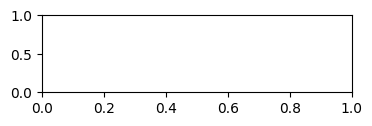

In [17]:
import os

# Create the 'output' directory if it doesn't exist
if not os.path.exists("./output"):
    os.makedirs("./output")

pred_ensemble_rf_lasso = 0.7*pred_rd + 0.3*pred_lasso
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':pred_ensemble_rf_lasso})
submission.to_csv("./output/sub-ensemble_rf_lasso-30_03_2017.csv", index=False)
submission.head()

In [18]:
pred_ensemble_rf_ridge = 0.7*pred_rd + 0.3*pred_ridge
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':pred_ensemble_rf_ridge})
submission.to_csv("./output/sub-ensemble_rf_ridge-30_03_2017.csv", index=False)
submission.head()

,Id,SalePrice
0,1461,inf
1,1462,inf
2,1463,inf
3,1464,inf
4,1465,inf


In [19]:
pred_ensemble_rf_xgb = 0.4*pred_rd + 0.6*pred_xgb
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':pred_ensemble_rf_xgb})
submission.to_csv("./output/sub-ensemble_rf_xgb-30_03_2017.csv", index=False)
submission.head()


,Id,SalePrice
0,1461,inf
1,1462,inf
2,1463,inf
3,1464,inf
4,1465,inf
